In [1]:
using LinearAlgebra

In [2]:
using Plots
using LaTeXStrings

In [ ]:
using ITensors
ITensors.compile()

The directory "C:\Users\joaqu\.julia\sysimages" doesn't exist yet, creating it now.

Creating the system image "C:\Users\joaqu\.julia\sysimages\sys_itensors.so" containing the compiled version of ITensors. This may take a few minutes.


Precompiling project...
  ✓ IteratorInterfaceExtensions
  ✓ TensorCore
  ✓ LaTeXStrings
  ✓ StatsAPI
  ✓ Example
  ✓ ExprTools
  ✓ Contour
  ✓ AbstractFFTs
  ✓ Pipe
  ✓ IntegerMathUtils
  ✓ UnPack
  ✓ OpenLibm_jll
  ✓ InitialValues
  ✓ ConcurrentUtilities
  ✓ SoftGlobalScope
  ✓ Measures
  ✓ PrettyPrint
  ✓ VersionParsing
  ✓ CompilerSupportLibraries_jll
  ✓ ArgCheck
  ✓ Statistics
  ✓ SuiteSparse_jll
  ✓ SerializedElementArrays
  ✓ DataValueInterfaces
  ✓ Grisu
  ✓ ExternalDocstrings
  ✓ Compat
  ✓ Observables
  ✓ Reexport
  ✓ InverseFunctions
  ✓ Zlib_jll
  ✓ OrderedCollections
  ✓ MbedTLS_jll
  ✓ Unzip
  ✓ LinearMaps
  ✓ Preferences
  ✓ DocStringExtensions
  ✓ Pidfile
  ✓ PCRE2_jll
  ✓ SimpleBufferStream
  ✓ CompositionsBase
  ✓ ExceptionUnwrapping
  ✓ URIs
  ✓ Formatting
  ✓ Requires
  ✓ DefineSingletons
  ✓ BitIntegers
  ✓ DelimitedFiles
  ✓ PackageExtensionCompat
  ✓ IrrationalConstants
  ✓ Zeros
  ✓ DataAPI
  ✓ BitFlags
  ✓ Scratch
  ✓ LoggingExtras
  ✓ UnicodeFun
  ✓ Indexing
 

After sweep 1 energy=-7.3139932204651945  maxlinkdim=10 maxerr=1.31E-04 time=47.781
After sweep 2 energy=-7.36547502141628  maxlinkdim=10 maxerr=9.07E-04 time=0.025
After sweep 3 energy=-7.366099723927951  maxlinkdim=10 maxerr=9.19E-04 time=0.061


### Exact Diagonalization.

In [4]:
S_z = [1 0; 0 -1]/2
S_plus = [0 1; 0 0]
S_minus = [0 0; 1 0]
Identity = [1 0; 0 1] #or Using LinearAlgebra and Matrix{Float64}(I, 2, 2)

# This is another way to calculate kronecker products:
# using Kronecker
# kronecker(I, I, I,I)
# I⊗I⊗I⊗I

function SZ_Term(N, delta)
    Matrix_Sz = zeros(2^N, 2^N)
    
    for i=1:N-1
        M = Identity
        
        if i == 1
            M = S_z
        end

        M = M*delta

        for j=2:N 
            if j == i || j == i + 1
            M = kron(M, S_z)
            else
            M = kron(M, Identity)        
            end
        end 

        Matrix_Sz = Matrix_Sz + M
    end

    return Matrix_Sz
end

function SPlus_Minus_Term(N)
    Matriz_SP_SM = zeros(2^N, 2^N)
    
    for i=1:N-1
        M = Identity
        
        if i == 1
            M = S_plus
        end

        M = M/2

        for j=2:N 
            if j == i
            M = kron(M, S_plus)
            elseif j == i + 1
            M = kron(M, S_minus)
            else
            M = kron(M, Identity)        
            end
        end 

        Matriz_SP_SM = Matriz_SP_SM + M
    end

    return Matriz_SP_SM
end

function SMinus_Plus_Term(N)
    Matriz_SM_SP = zeros(2^N, 2^N)
    
    for i=1:N-1
        M = Identity
        
        if i == 1
            M = S_minus
        end

        M = M/2

        for j=2:N 
            if j == i
            M = kron(M, S_minus)
            elseif j == i + 1
            M = kron(M, S_plus)
            else
            M = kron(M, Identity)        
            end
        end 

        Matriz_SM_SP = Matriz_SM_SP + M
    end

    return Matriz_SM_SP
end

function Enlarge_Matrix_site_j(j, N, matrix)

    M = Identity
    
    if j == 1
        M = matrix
    end    
    
    for i=2:N 
        if i == j
        M = kron(M, matrix)
        else
        M = kron(M, Identity)        
        end
    end

    return M
end

function Correlation_Matrix_site_i_j(i,j,N, matrix)
    M = Identity
    
    if j == 1 || i == 1
        M = matrix
    end    
    
    for k=2:N 
        if k == j
        M = kron(M, matrix)
        elseif k == i
        M = kron(M, matrix)
        else
        M = kron(M, Identity)        
        end
    end

    return M
end

Correlation_Matrix_site_i_j (generic function with 1 method)

In [5]:
function Exact_Diagonalization(N, delta)
    if N > 12
        return "Error: N > 12"
    end

    H = SZ_Term(N, delta) + SPlus_Minus_Term(N) + SMinus_Plus_Term(N)
    return eigen(H).values, eigen(H).vectors
end 

function Exact_expected_value_global_operator(state, operator)
    if (length(state), length(state)) != size(operator)
        return "Error. Different Dimensions"
    end
    return transpose(state)*operator*state
end

function Exact_expected_value_local_operator_site_j(state, operator, j)
    Matrix = Enlarge_Matrix_site_j(j, log2(length(state)), operator) #N = log2(length(state))
    return transpose(state)*Matrix*state
end

function Determine_GAP_Without_knowing_EigenVals(N, delta)
    Vals, Vects = Exact_Diagonalization(N, delta)
    return abs(Vals[2] - Vals[1])
end

function Determine_GAP_knowing_EigenVals(Vals)
    return abs(Vals[2] - Vals[1])
end

Determine_GAP_knowing_EigenVals (generic function with 1 method)

In [6]:
# Tests:

# SZ_Term(3, 0) == kron(S_z, S_z, Identity) + kron(Identity, S_z, S_z)
# SPlus_Minus_Term(3) == kron(S_plus, S_minus, Identity)/2 + kron(Identity, S_plus, S_minus)/2
# SMinus_Plus_Term(3) == kron(S_minus, S_plus, Identity)/2 + kron(Identity, S_minus, S_plus)/2

# Enlarge_Matrix_site_j(3, 4, S_plus) == kron(Identity, Identity, S_plus, Identity)
# Enlarge_Matrix_site_j(5, 10, S_plus) == kron(Identity, Identity, Identity, Identity, S_plus, Identity, Identity, Identity, Identity, Identity)
# Enlarge_Matrix_site_j(4, 9, S_minus) == kron(Identity, Identity, Identity, S_minus, Identity, Identity, Identity, Identity, Identity)

# Correlation_Matrix_site_i_j(1,3,4, S_z) == kron(S_z, Identity, S_z, Identity)
# Correlation_Matrix_site_i_j(4,8,10, S_plus) == kron(Identity, Identity, Identity, S_plus, Identity, Identity,Identity, S_plus, Identity, Identity)

# Exact_expected_value_global_operator(vect[:,2], H) == transpose(vect[:,2])*H*vect[:,2] 
# Exact_expected_value_global_operator(vect[:,3], H) == transpose(vect[:,3])*H*vect[:,3]

# Exact_expected_value_local_operator_site_j(vect[:,2], S_z, 2) == transpose(vect[:,2])*kron(Identity, S_z, Identity, Identity)*vect[:,2] 
# Exact_expected_value_local_operator_site_j(vect[:,3], S_plus, 3) == transpose(vect[:,3])*kron(Identity, Identity, S_plus, Identity)*vect[:,3] 

# Exact_expected_value_global_operator(vect[:,2], Enlarge_Matrix_site_j(2, 4, S_z)) == Exact_expected_value_local_operator_site_j(vect[:,2], S_z, 2) 

In [7]:
@time begin
Eigvals, Eigvects = Exact_Diagonalization(12, 0.5)
end

 39.280386 seconds (1.30 M allocations: 10.962 GiB, 0.91% gc time, 1.72% compilation time)

([-4.338148330927074, -4.141184152716199, -4.141184152716199, -4.0503981614302775, -3.8466697148184803, -3.8466697148184803, -3.763339422957506, -3.7321344323224688, -3.576374332146933, -3.576374332146932  …  2.7636480597150954, 2.774346235512723, 2.882252115636136, 2.882252115636136, 2.882252115636136, 2.882252115636136, 2.9319045876847833, 3.0409539274749267, 3.0409539274749275, 3.0944851997687484], [0.0 0.0 … 0.0 0.0; 1.3845388873937006e-46 5.518279640229265e-49 … 4.714072442053376e-44 -5.3534065277983905e-46; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [8]:
N = 12

Gaps_ED = []
for delta = range(-2,2, 8) # Approx 400 segs (6-7 minutes)
    Gap = Determine_GAP_Without_knowing_EigenVals(N, delta)
    append!(Gaps_ED, Gap)    
end

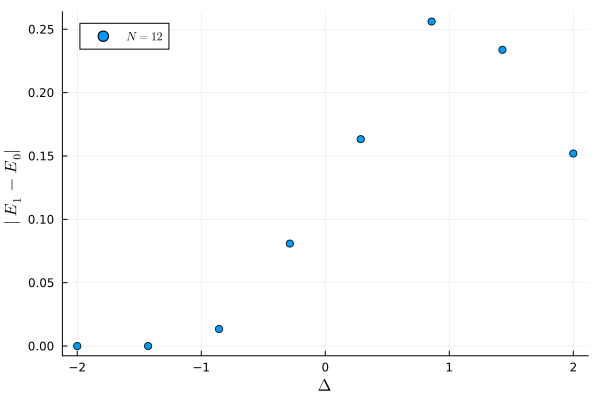

In [9]:
# gaps = [0.0,
#  0.0,
#  0.013420550413453913,
#  0.08087298335697968,
#  0.16326314760838256,
#  0.2560838594127093,
#  0.23378779190092303,
#  0.15194300989367981]

scatter(range(-2,2, 8), Gaps_ED, label= L"N = 12")  

xlabel!(L"\Delta")
ylabel!(L"|E_{1} - E_{0}|")

In [10]:
# N = 12

# Center = round(N/2)
# i = Center 
# j = Center

# for k = 1:N-1
    
#     Center = round(N/2)
#     if k % 2 != 0
#         i = i 
#         j = j + 1
#     else
#         i = i - 1
#         j = j 
#     end

#     print(i,"  ", j, "  ")
#     println(abs(i-j))

# end

In [11]:
N = 12
delta = 0.5

Eigvals, Eigvects = Exact_Diagonalization(N, delta)
GS_State = Eigvects[:,1]

4096-element Vector{Float64}:
  0.0
  1.3845388873937006e-46
 -2.4676053149079793e-46
  9.59859065506875e-47
  1.3913590176485053e-46
 -2.1648455885367078e-46
  1.014641569757421e-46
  1.1398162310566662e-46
  2.293214551765292e-47
  2.518657010767397e-46
 -1.153451539927052e-47
 -3.0081774842137974e-47
  1.5239555608214862e-47
  ⋮
  5.12767513730475e-18
  4.693019969297929e-18
 -1.7125795346296707e-18
  0.0
  1.5607130397113105e-17
 -2.266477619690058e-18
  5.6674898664427075e-19
  0.0
  2.6342321635584226e-17
  0.0
  0.0
  0.0

In [12]:
N = 12

Expected_Value_S_z_varying_site_j = []

for j = 1:N
    Value = Exact_expected_value_local_operator_site_j(GS_State, S_z, j)
    append!(Expected_Value_S_z_varying_site_j, Value)
    
end

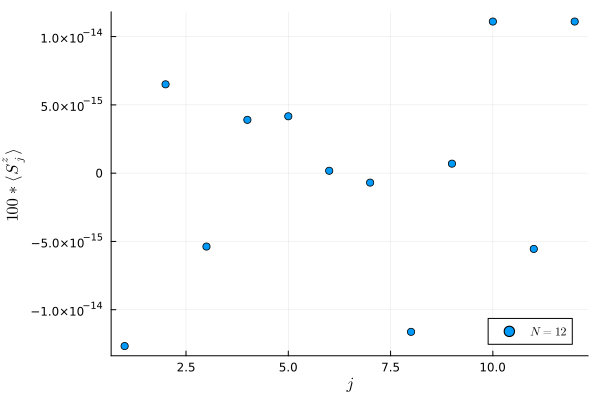

In [13]:
scatter(1:N, Expected_Value_S_z_varying_site_j*100, label= L"N = 12")  

xlabel!(L"j")
ylabel!(L"100*\langle S^{z}_{j} \rangle")

In [14]:
Distance_ij = []
Correlation_value_Sz = []

Center = round(N/2)
i = Center 
j = Center
    
for k = 1:N-1
    Center = round(N/2)
    if k % 2 != 0
        i = i 
        j = j + 1
    else
        i = i - 1
        j = j 
    end

    global_operator_correlation_ij = Correlation_Matrix_site_i_j(i,j,N, S_z)
    correlation = Exact_expected_value_global_operator(GS_State, global_operator_correlation_ij)

    append!(Distance_ij, abs(i-j)) #x
    append!(Correlation_value_Sz, correlation) #y

end

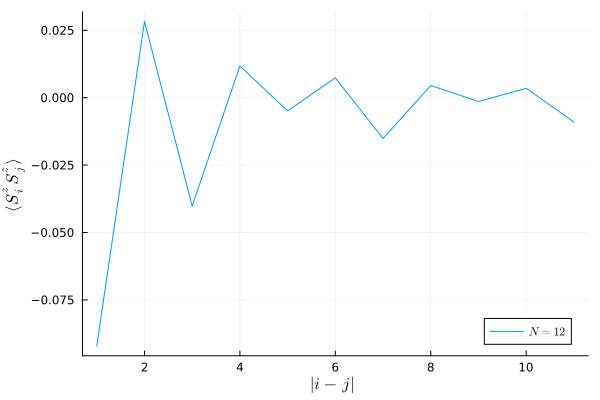

In [42]:
plot(Distance_ij, Correlation_value_Sz, label= L"N = 12")  

xlabel!(L"|i - j |")
ylabel!(L"\langle S^{z}_{i}S^{z}_{j} \rangle")

### DMRG

In [4]:
function Create_MPO(N, delta) # Make N S=1/2 spin indices 
    sites = siteinds("S=1/2",N) 
    # Input the operator terms 
    
    os = OpSum() 
    for i=1:N-1 
        os += delta,"Sz",i,"Sz",i+1 
        os += 1/2,"S+",i,"S-",i+1 
        os += 1/2,"S-",i,"S+",i+1 
    end 
    
    # Convert these terms to an MPO 
    H = MPO(os,sites)
    return H, sites
end

Create_MPO (generic function with 1 method)

In [ ]:
N = 100
delta = 0.5

nsweeps = 5
maxdim = [10,20,100,100,200] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized
cutoff = [1E-10] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized


H, sites = Create_MPO(N, delta) #Heisenberg Hamiltonian MPO
psi0 = randomMPS(sites,10) #psi0 is used to initialize the MPS to be optimized.

energy_ground_state, psi_ground_state = dmrg(H,psi0; nsweeps, maxdim, cutoff) #30 Segs aprox
energy_1_excited_state, psi_1_excited_state = dmrg(H,[psi_ground_state], psi0; nsweeps, maxdim, cutoff)
# energy_2_excited_state, psi_2_excited_state = dmrg(H,[psi_ground_state, psi_1_excited_state], psi0; nsweeps, maxdim, cutoff)

After sweep 1 energy=-37.23108271302055  maxlinkdim=10 maxerr=3.75E-03 time=1.508
After sweep 2 energy=-37.31510753549774  maxlinkdim=20 maxerr=2.40E-06 time=2.283
After sweep 3 energy=-37.32560720785566  maxlinkdim=66 maxerr=9.99E-11 time=6.976
After sweep 4 energy=-37.3274788543254  maxlinkdim=85 maxerr=1.00E-10 time=18.030
After sweep 5 energy=-37.32761425898238  maxlinkdim=98 maxerr=9.99E-11 time=15.759
After sweep 1 energy=-37.21472543022977  maxlinkdim=10 maxerr=3.75E-03 time=2.696
After sweep 2 energy=-37.28736250073154  maxlinkdim=20 maxerr=2.39E-06 time=2.196
After sweep 3 energy=-37.29943057085788  maxlinkdim=69 maxerr=9.99E-11 time=7.043


In [6]:
function Determine_GAP_Using_DMRG(N, delta)
    H, sites = Create_MPO(N, delta) #Heisenberg Hamiltonian MPO
    psi0 = randomMPS(sites,10) #psi0 is used to initialize the MPS to be optimized.

    nsweeps = 5
    maxdim = [10,20,100,100,200] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized
    cutoff = [1E-10] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized
    
    energy_ground_state, psi_ground_state = dmrg(H,psi0; nsweeps, maxdim, cutoff)
    energy_1_excited_state, psi_1_excited_state = dmrg(H,[psi_ground_state], psi0; nsweeps, maxdim, cutoff)

    return abs(energy_1_excited_state - energy_ground_state)
end

function Create_Array_With_Gaps(N, range_delta)
    Gaps_DMRG = []
    for delta = range_delta 
        Gap = Determine_GAP_Using_DMRG(N, delta)
        append!(Gaps_DMRG, Gap)    
    end

    return Gaps_DMRG
end

Create_Array_With_Gaps (generic function with 1 method)

In [19]:
Determine_GAP_Using_DMRG(100, 0.5)

After sweep 1 energy=-37.26663197793847  maxlinkdim=10 maxerr=3.03E-03 time=0.250
After sweep 2 energy=-37.32199388182425  maxlinkdim=20 maxerr=1.27E-06 time=1.006
After sweep 3 energy=-37.32743967426448  maxlinkdim=72 maxerr=9.96E-11 time=3.322
After sweep 4 energy=-37.32761709052645  maxlinkdim=97 maxerr=1.02E-10 time=8.111
After sweep 5 energy=-37.32761919859582  maxlinkdim=107 maxerr=1.00E-10 time=10.581
After sweep 1 energy=-37.241713887508425  maxlinkdim=10 maxerr=3.03E-03 time=0.319
After sweep 2 energy=-37.295708848147896  maxlinkdim=20 maxerr=2.69E-06 time=0.758
After sweep 3 energy=-37.30041571407931  maxlinkdim=78 maxerr=9.98E-11 time=3.902
After sweep 4 energy=-37.30090208882822  maxlinkdim=100 maxerr=5.82E-10 time=8.816
After sweep 5 energy=-37.301014506241536  maxlinkdim=107 maxerr=1.00E-10 time=10.802


0.026604692354283088

In [20]:
Determine_GAP_Using_DMRG(12, 0.5)

After sweep 1 energy=-4.337368313212327  maxlinkdim=10 maxerr=3.09E-04 time=0.040
After sweep 2 energy=-4.338148307363397  maxlinkdim=20 maxerr=1.44E-09 time=0.021
After sweep 3 energy=-4.338148330276603  maxlinkdim=25 maxerr=5.76E-11 time=0.044
After sweep 4 energy=-4.3381483302766775  maxlinkdim=25 maxerr=5.76E-11 time=0.095
After sweep 5 energy=-4.338148330276676  maxlinkdim=25 maxerr=5.76E-11 time=0.046
After sweep 1 energy=-4.1266202803877245  maxlinkdim=10 maxerr=5.04E-04 time=0.020
After sweep 2 energy=-4.141112292719772  maxlinkdim=20 maxerr=2.88E-08 time=0.049
After sweep 3 energy=-4.141184137694732  maxlinkdim=30 maxerr=8.00E-11 time=0.046
After sweep 4 energy=-4.14118415172013  maxlinkdim=26 maxerr=8.48E-11 time=0.033
After sweep 5 energy=-4.141184151720742  maxlinkdim=26 maxerr=8.29E-11 time=0.058


0.19696417855593396

In [21]:
Gaps_DMRG_12 =  Create_Array_With_Gaps(12, range(-2,2, 8))
Gaps_DMRG_50 =  Create_Array_With_Gaps(50, range(-2,2, 8))
Gaps_DMRG_100 =  Create_Array_With_Gaps(100, range(-2,2, 8))

After sweep 1 energy=-5.499762925454809  maxlinkdim=10 maxerr=1.18E-03 time=0.013
After sweep 2 energy=-5.499999986128357  maxlinkdim=6 maxerr=9.45E-11 time=0.029
After sweep 3 energy=-5.4999999999992575  maxlinkdim=2 maxerr=1.38E-11 time=0.011
After sweep 4 energy=-5.5000000000000036  maxlinkdim=2 maxerr=2.25E-15 time=0.015
After sweep 5 energy=-5.499999999999998  maxlinkdim=2 maxerr=2.06E-15 time=0.034
After sweep 1 energy=-5.4997768830348  maxlinkdim=10 maxerr=1.18E-03 time=0.050
After sweep 2 energy=-5.499999997959479  maxlinkdim=4 maxerr=8.28E-11 time=0.022
After sweep 3 energy=-5.49999999999995  maxlinkdim=2 maxerr=2.80E-13 time=0.030
After sweep 4 energy=-5.5  maxlinkdim=2 maxerr=1.11E-16 time=0.036
After sweep 5 energy=-5.499999999999989  maxlinkdim=2 maxerr=2.22E-16 time=0.028
After sweep 1 energy=-3.9284406151950995  maxlinkdim=10 maxerr=1.19E-03 time=0.034
After sweep 2 energy=-3.92857141640334  maxlinkdim=8 maxerr=9.48E-11 time=0.074
After sweep 3 energy=-3.9285714285295326

8-element Vector{Any}:
 0.7500000001712408
 0.36428574479721476
 0.008134426024028585
 0.011033039856680915
 0.021657083162686774
 0.0376110178993585
 0.01390673219320604
 1.1177762452518891e-5

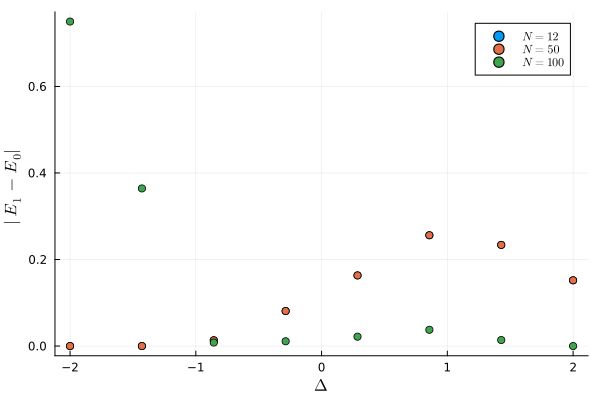

In [41]:
scatter(range(-2,2, 8),Gaps_DMRG_12, label= L"N = 12")  
scatter!(range(-2,2, 8),Gaps_DMRG_12, label= L"N = 50")  
scatter!(range(-2,2, 8),Gaps_DMRG_100, label= L"N = 100")  

xlabel!(L"\Delta")
ylabel!(L"|E_{1} - E_{0}|")

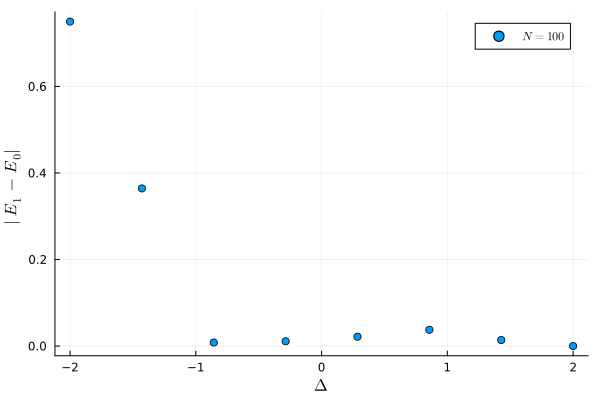

In [23]:
scatter(range(-2,2, 8),Gaps_DMRG_100, label= L"N = 100")  

xlabel!(L"\Delta")
ylabel!(L"|E_{1} - E_{0}|")

In [ ]:
N = 12

delta = 0.5

nsweeps = 5
maxdim = [10,20,100,100,200] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized
cutoff = [1E-10] #maxdim - integer or array of integers specifying the maximum size allowed for the bond dimension or rank of the MPS being optimized

H, sites = Create_MPO(N, delta) #Heisenberg Hamiltonian MPO
psi0 = randomMPS(sites,10) #psi0 is used to initialize the MPS to be optimized.
energy_ground_state, psi_ground_state = dmrg(H,psi0; nsweeps, maxdim, cutoff) #30 Segs aprox


# "Expected_Value_S_z_varying_site_j_DMRG = expect(psi_ground_state,"Sz")

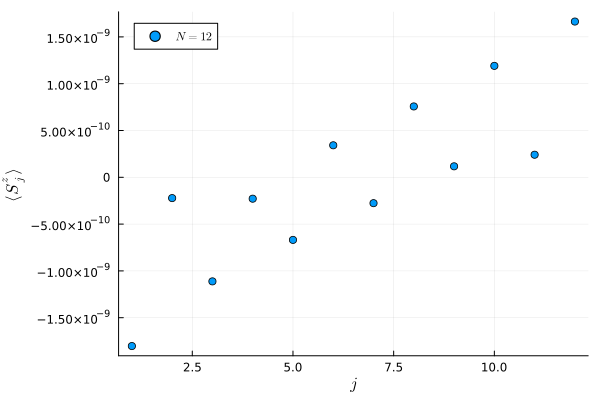

In [30]:
scatter(1:N, Expected_Value_S_z_varying_site_j_DMRG, label= L"N = 12")  

xlabel!(L"j")
ylabel!(L"\langle S^{z}_{j} \rangle")

In [30]:
Correlation_Matrix = correlation_matrix(psi_ground_state,"Sz","Sz")

100×100 Matrix{Float64}:
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25


In [31]:
Distance_ij = []
Correlation_value_Sz_DMRG = []

Center = round(N/2)
i = Center 
j = Center
    
for k = 1:N-1
    Center = round(N/2)
    if k % 2 != 0
        i = i 
        j = j + 1
    else
        i = i - 1
        j = j 
    end

    correlation = Correlation_Matrix[trunc(Int,i),trunc(Int,j)]

    append!(Distance_ij, abs(i-j)) #x
    append!(Correlation_value_Sz_DMRG, correlation) #y

end

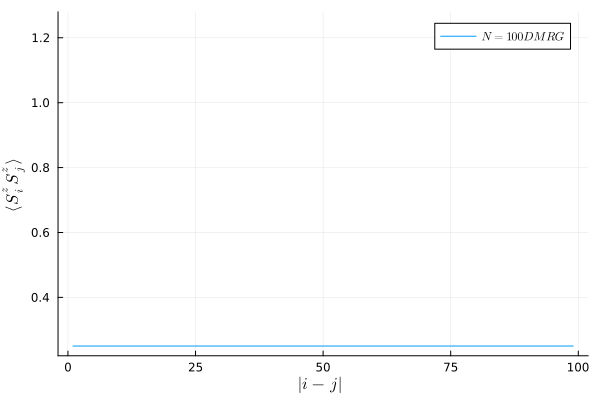

In [32]:
plot(Distance_ij, Correlation_value_Sz_DMRG, label= L"N = 100 DMRG")  
# plot!(Distance_ij, Correlation_value_Sz, label= L"N = 12 ED")  


xlabel!(L"|i - j |")
ylabel!(L"\langle S^{z}_{i}S^{z}_{j} \rangle")

### Exact Diagonalization vs DMRG Comparison

#### 1. Eigenvalues:

In [24]:
Vals, Vects = Exact_Diagonalization(N, delta)

"Error: N > 12"

In [25]:
println(energy_ground_state,Vals[1])

-37.32761776218393E


In [26]:
println(energy_1_excited_state,Vals[2])

LoadError: BoundsError

In [27]:
# println(energy_2_excited_state,Vals[3])